### Check GPU

In [1]:
!nvidia-smi

Mon Feb 16 17:48:14 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             42W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install dependencies

In [3]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 144.6 MB/s eta 0:00:00


## Imports

In [4]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

## Pull dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("third-year-project-1jb5c").project("football-field-detection-f07vi-hwn6o")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-field-detection-1 in yolov8:: 100%|██████████| 646/646 [00:00<00:00, 3491.85it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.

In [6]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

## Custom training

In [7]:
%cd {HOME}

!yolo task=pose mode=train model=yolov8x-pose.pt data={dataset.location}/data.yaml batch=16 epochs=200 imgsz=1280 workers=8 plots=True

/content
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (NVIDIA A100-SXM4-40GB, 40441MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/football-field-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimiz

In [8]:
!ls {HOME}/runs/pose/train/

args.yaml			 PoseP_curve.png      train_batch3041.jpg
BoxF1_curve.png			 PosePR_curve.png     train_batch3042.jpg
BoxP_curve.png			 PoseR_curve.png      val_batch0_labels.jpg
BoxPR_curve.png			 results.csv	      val_batch0_pred.jpg
BoxR_curve.png			 results.png	      val_batch1_labels.jpg
confusion_matrix_normalized.png  train_batch0.jpg     val_batch1_pred.jpg
confusion_matrix.png		 train_batch1.jpg     weights
labels.jpg			 train_batch2.jpg
PoseF1_curve.png		 train_batch3040.jpg


/content


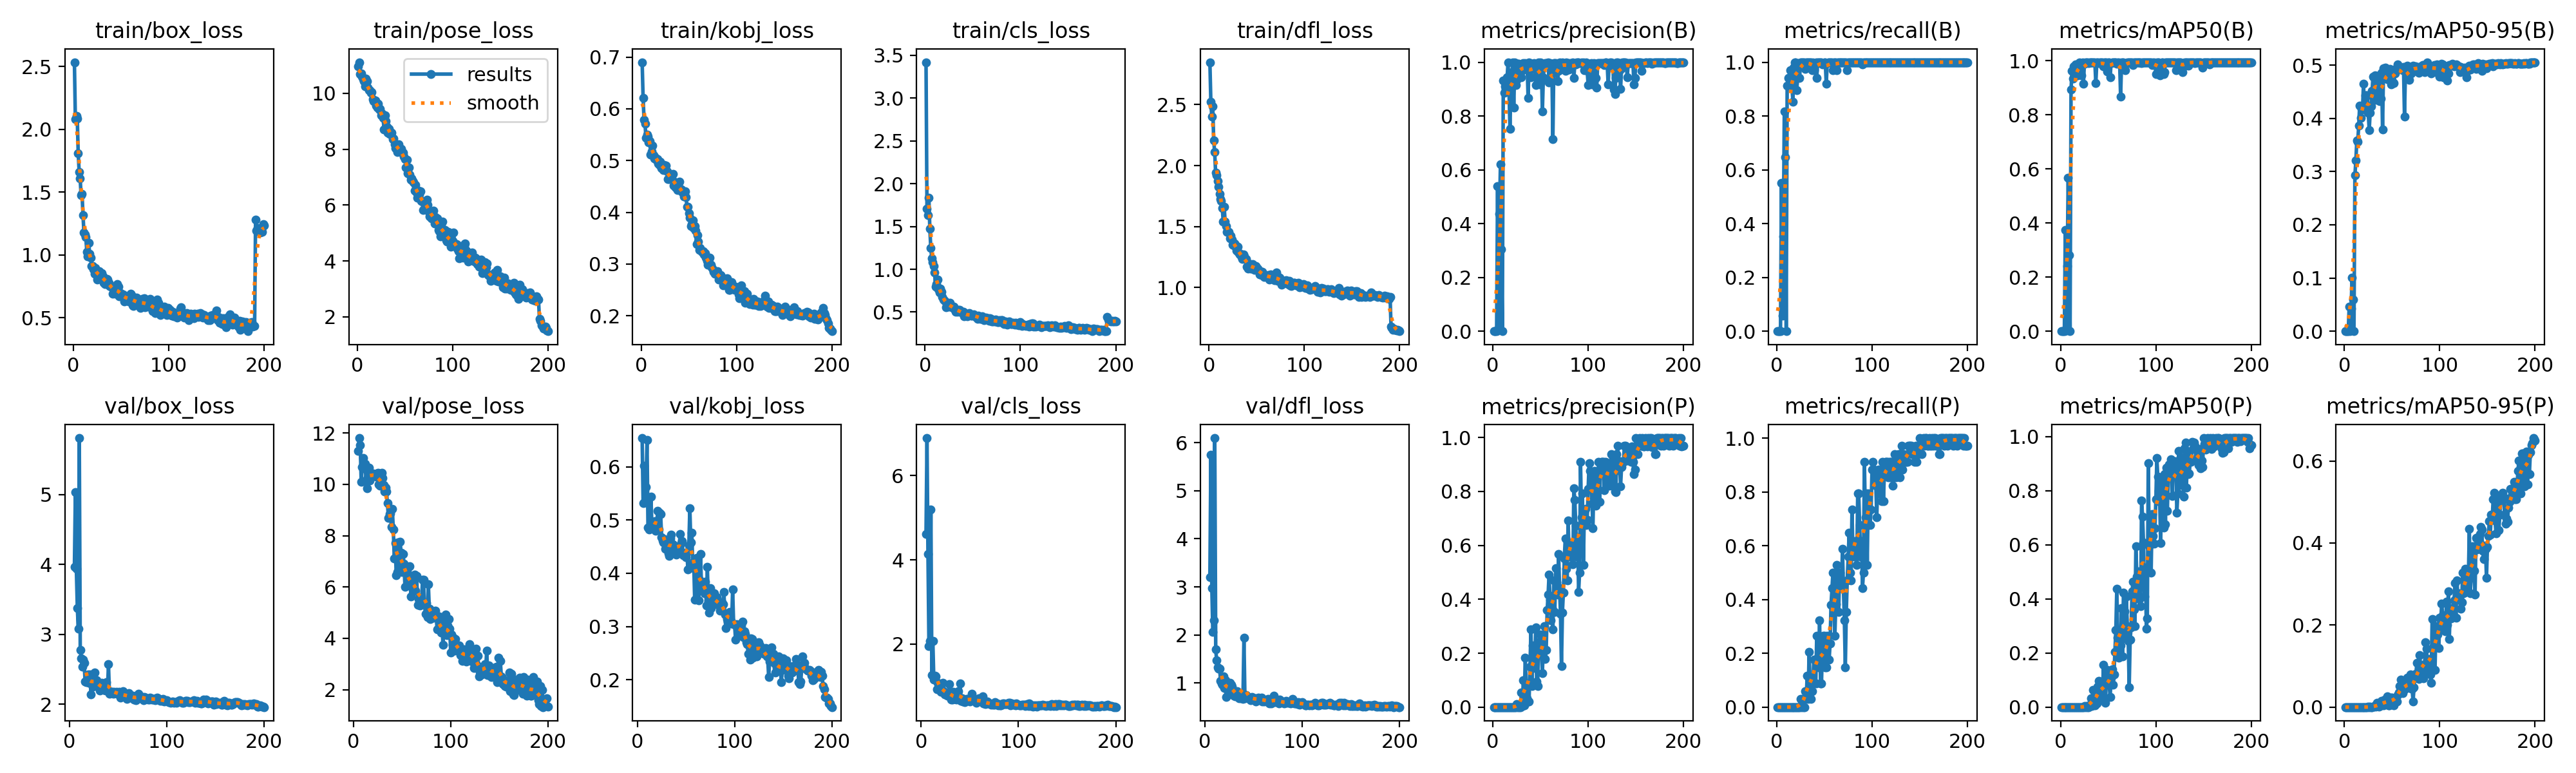

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train/results.png', width=600)

/content


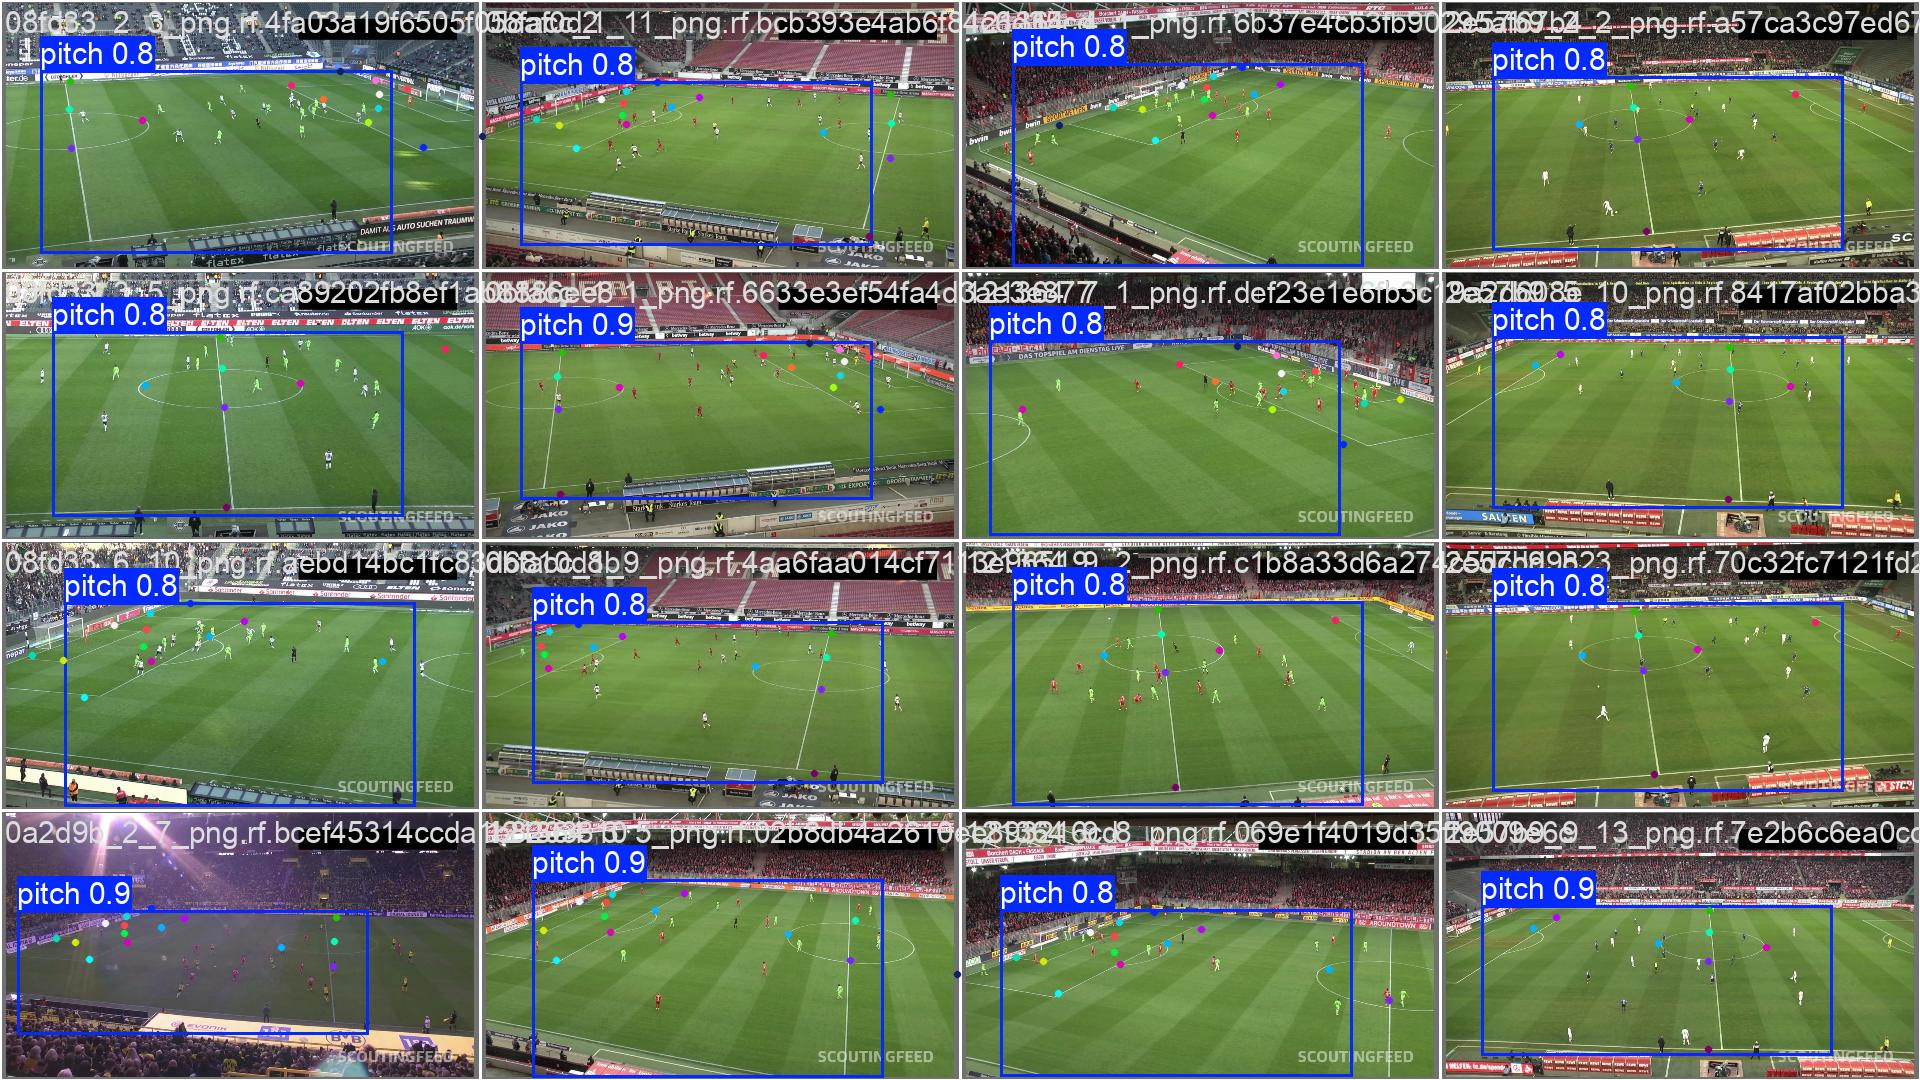

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train/val_batch0_pred.jpg', width=600)

## Validate custom model

In [11]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train/weights/best.pt data={dataset.location}/data.yaml imgsz=1280

/content
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (NVIDIA A100-SXM4-40GB, 40441MiB)
YOLOv8x-pose summary (fused): 122 layers, 69,784,275 parameters, 0 gradients, 264.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3557.7±466.4 MB/s, size: 241.3 KB)
val: Scanning /content/datasets/football-field-detection-1/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 34/34 5.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.9it/s 1.6s
                   all         34         34      0.998          1      0.995      0.505      0.968      0.971      0.958       0.65
Speed: 8.5ms preprocess, 16.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/runs/pose/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Test custom model

In [12]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train/weights/best.pt data={dataset.location}/data.yaml imgsz=1280 split=test

/content
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (NVIDIA A100-SXM4-40GB, 40441MiB)
YOLOv8x-pose summary (fused): 122 layers, 69,784,275 parameters, 0 gradients, 264.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 260.2±339.4 MB/s, size: 214.4 KB)
val: Scanning /content/datasets/football-field-detection-1/test/labels... 28 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 28/28 478.2it/s 0.1s
val: New cache created: /content/datasets/football-field-detection-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.6it/s 1.2s
                   all         28         28      0.998          1      0.995       0.51      0.998          1      0.995      0.722
Speed: 5.8ms preprocess, 15.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/runs/pose/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Qualitative Analysis

In [13]:
!yolo task=pose mode=predict model=runs/pose/train/weights/best.pt source={dataset.location}/valid/images imgsz=1280 conf=0.25 save=True save_txt=False

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (NVIDIA A100-SXM4-40GB, 40441MiB)
YOLOv8x-pose summary (fused): 122 layers, 69,784,275 parameters, 0 gradients, 264.7 GFLOPs

image 1/34 /content/datasets/football-field-detection-1/valid/images/08fd33_2_3_png.rf.4fa03a19f6505f058af0d23479fb583d.jpg: 736x1280 1 pitch, 94.7ms
image 2/34 /content/datasets/football-field-detection-1/valid/images/08fd33_3_5_png.rf.ca89202fb8ef1ab8886ee8d9dfda4172.jpg: 736x1280 1 pitch, 18.6ms
image 3/34 /content/datasets/football-field-detection-1/valid/images/08fd33_6_10_png.rf.aebd14bc1fc83d6810d8b9d5adfe9457.jpg: 736x1280 1 pitch, 18.7ms
image 4/34 /content/datasets/football-field-detection-1/valid/images/0a2d9b_2_7_png.rf.bcef45314ccda1b82038103abd081339.jpg: 736x1280 1 pitch, 18.6ms
image 5/34 /content/datasets/football-field-detection-1/valid/images/0bfacc_1_11_png.rf.bcb393e4ab6f84c6d35cdbf3ed039e39.jpg: 736x1280 1 pitch, 18.7ms
image 6/34 /content/datasets/football-field-detection-1/valid

In [14]:
!yolo task=pose mode=predict model=runs/pose/train/weights/best.pt source={dataset.location}/test/images imgsz=1280 conf=0.25 save=True save_txt=False

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (NVIDIA A100-SXM4-40GB, 40441MiB)
YOLOv8x-pose summary (fused): 122 layers, 69,784,275 parameters, 0 gradients, 264.7 GFLOPs

image 1/28 /content/datasets/football-field-detection-1/test/images/08fd33_2_9_png.rf.d8c425b58ae7f629101823cf0c19df8b.jpg: 736x1280 2 pitchs, 94.1ms
image 2/28 /content/datasets/football-field-detection-1/test/images/08fd33_4_11_png.rf.8d700e68fff223dd3daee9aa03d3dbc3.jpg: 736x1280 1 pitch, 16.5ms
image 3/28 /content/datasets/football-field-detection-1/test/images/08fd33_4_3_png.rf.9ea43f8df4442657cf1d7e595298f799.jpg: 736x1280 1 pitch, 16.5ms
image 4/28 /content/datasets/football-field-detection-1/test/images/08fd33_9_2_png.rf.6ba2fe347a460a2fde86b07815641aed.jpg: 736x1280 1 pitch, 16.5ms
image 5/28 /content/datasets/football-field-detection-1/test/images/0a2d9b_2_2_png.rf.43b6aac283d6e896cac2627039f92216.jpg: 736x1280 1 pitch, 16.5ms
image 6/28 /content/datasets/football-field-detection-1/test/image

## Zip Important results

In [15]:
import os, glob

RUN_DIR = "runs/pose/train"   # change if your run is train2/train3
BEST = f"{RUN_DIR}/weights/best.pt"
LAST = f"{RUN_DIR}/weights/last.pt"
DATA = f"{dataset.location}/data.yaml"

print("BEST exists:", os.path.exists(BEST), BEST)
print("DATA exists:", os.path.exists(DATA), DATA)


BEST exists: True runs/pose/train/weights/best.pt
DATA exists: True /content/datasets/football-field-detection-1/data.yaml


In [16]:
!zip -r pose_train_run.zip {RUN_DIR}
!zip -r pose_predict_outputs.zip runs/pose/predict*
!cp {DATA} ./data.yaml
!zip -r pose_dataset_yaml.zip data.yaml

  adding: runs/pose/train/ (stored 0%)
  adding: runs/pose/train/train_batch0.jpg (deflated 8%)
  adding: runs/pose/train/PoseR_curve.png (deflated 18%)
  adding: runs/pose/train/labels.jpg (deflated 56%)
  adding: runs/pose/train/BoxR_curve.png (deflated 18%)
  adding: runs/pose/train/args.yaml (deflated 53%)
  adding: runs/pose/train/train_batch3040.jpg (deflated 7%)
  adding: runs/pose/train/PosePR_curve.png (deflated 28%)
  adding: runs/pose/train/val_batch1_labels.jpg (deflated 14%)
  adding: runs/pose/train/BoxP_curve.png (deflated 25%)
  adding: runs/pose/train/confusion_matrix.png (deflated 40%)
  adding: runs/pose/train/BoxPR_curve.png (deflated 30%)
  adding: runs/pose/train/weights/ (stored 0%)
  adding: runs/pose/train/weights/best.pt (deflated 8%)
  adding: runs/pose/train/weights/last.pt (deflated 8%)
  adding: runs/pose/train/PoseF1_curve.png (deflated 17%)
  adding: runs/pose/train/train_batch1.jpg (deflated 5%)
  adding: runs/pose/train/train_batch3042.jpg (deflated 6%

## Deploy model on Roboflow

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-pose", model_path=f"{HOME}/runs/pose/train/")

Dependency ultralytics==8.0.196 is required but found version=8.4.14, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/third-year-project-1jb5c/football-field-detection-f07vi-hwn6o/1
Share your model with the world at: https://universe.roboflow.com/third-year-project-1jb5c/football-field-detection-f07vi-hwn6o/model/1
